## 03 – Modeling and Evaluation

This notebook covers:
- train/test split
- baseline classification model
- model evaluation using standard metrics

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import joblib

### Load dataset and preprocessing objects

In [2]:
DATA_PATH = "../data/raw/customer_churn.csv"
PREPROCESSOR_PATH = "../models/preprocessor.joblib"

df = pd.read_csv(DATA_PATH)
preprocessor = joblib.load(PREPROCESSOR_PATH)

TARGET_COL = "Churn"

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

### Train / test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Baseline model: Logistic Regression

A Logistic Regression model is used as a baseline classifier due to its
simplicity and interpretability.  
This provides a solid reference point before exploring more complex models.

In [ ]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Model evaluation

In [5]:
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]

In [6]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Accuracy: 0.760
ROC-AUC: 0.840


Logistic Regression achieves solid baseline performance, with ROC-AUC significantly higher than random, indicating good discriminative power despite model simplicity.

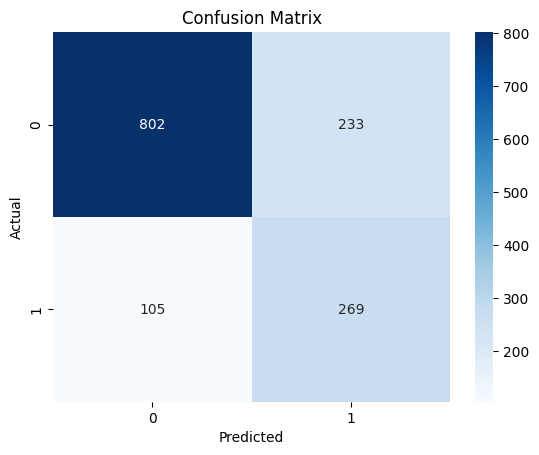

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.77      0.83      1035
         Yes       0.54      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



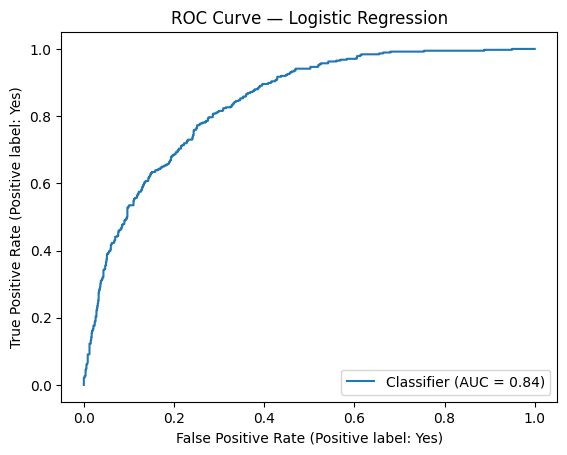

In [9]:
RocCurveDisplay.from_predictions(
    y_test,
    y_proba,
    pos_label="Yes"
)

plt.title("ROC Curve — Logistic Regression")
plt.show()

In [10]:
feature_names_num = preprocessor.transformers_[0][2]
feature_names_cat = preprocessor.transformers_[1][1] \
    .named_steps["onehot"] \
    .get_feature_names_out(preprocessor.transformers_[1][2])

feature_names = np.concatenate([feature_names_num, feature_names_cat])

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df.head(10)

,feature,coefficient
5759,TotalCharges_1052.35,1.513435
328,customerID_0607-DAAHE,1.513435
5837,TotalCharges_1099.6,1.488445
3591,customerID_6323-AYBRX,1.488445
8915,TotalCharges_4759.75,1.475639
1971,customerID_3512-IZIKN,1.475639
9156,TotalCharges_5154.6,1.426221
4901,customerID_8631-NBHFZ,1.426221
6955,TotalCharges_20.15,1.399801
6864,TotalCharges_19.9,1.392346


In [11]:
top_positive = coef_df.head(10)
top_negative = coef_df.tail(10)

top_positive, top_negative

(                    feature  coefficient
 5759   TotalCharges_1052.35     1.513435
 328   customerID_0607-DAAHE     1.513435
 5837    TotalCharges_1099.6     1.488445
 3591  customerID_6323-AYBRX     1.488445
 8915   TotalCharges_4759.75     1.475639
 1971  customerID_3512-IZIKN     1.475639
 9156    TotalCharges_5154.6     1.426221
 4901  customerID_8631-NBHFZ     1.426221
 6955     TotalCharges_20.15     1.399801
 6864      TotalCharges_19.9     1.392346,
                     feature  coefficient
 4217  customerID_7439-DKZTW    -0.559462
 2917  customerID_5150-ITWWB    -0.562600
 7985    TotalCharges_335.75    -0.562600
 7293      TotalCharges_24.7    -0.568935
 6191    TotalCharges_135.75    -0.588590
 5671      Contract_Two year    -0.639490
 8672        TotalCharges_44    -0.702234
 6414    TotalCharges_151.75    -0.734625
 7291      TotalCharges_24.4    -0.810113
 1                    tenure    -0.821885)

In [12]:
joblib.dump(model, "../models/logistic_regression.joblib")

['../models/logistic_regression.joblib']